### COS80026 - DATA SCIENCE PROJECT 2

### Assignment 5

### GooglePlayStore Data Analytics

### Group 4

In [1]:
#importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset 
sales = pd.read_csv('GP04_vgsales.csv')

In [3]:
#checking samples from the dataset
sales.sample(n=5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7568,7570,All Star Pro-Wrestling,PS2,2000.0,Fighting,SquareSoft,0.00,0.00,0.20,0.00,0.20
2241,2243,Inazuma Eleven 3,DS,2010.0,Role-Playing,Level 5,0.00,0.00,0.93,0.00,0.93
2926,2928,Ape Escape: On the Loose,PSP,2005.0,Platform,Sony Computer Entertainment,0.52,0.01,0.12,0.05,0.70
8443,8445,Wildstar,PC,2014.0,Role-Playing,NCSoft,0.08,0.07,0.00,0.02,0.17
10992,10994,Pokemon Rumble World,3DS,2015.0,Action,Nintendo,0.00,0.01,0.08,0.00,0.09


In [4]:
#checking shape
sales.shape

(16598, 11)

In [5]:
#converting column names from uppercase to lowercase
sales.columns = sales.columns.str.lower()

In [6]:
#checking:
    #number of rows
    #number of columns 
    #columns names 
    #data types
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
#printing descriptive statistics
sales.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
#checking for duplicates
sales.duplicated().sum()

0

In [9]:
#checking for missing values
sales.isnull().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [10]:
#finding the rows with missing values
is_NaN = sales.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = sales[row_has_NaN]
rows_with_NaN.head(10)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


In [11]:
#dropping rows with 'Year' missing
sales = sales.dropna(subset=['year'])

In [12]:
#converting float type of year to integer type
sales['year'] = sales['year'].astype(float).astype(int)

In [13]:
#replacing missing values to unknown for publisher
sales['publisher'] = sales['publisher'].fillna('Unknown')

In [14]:
#checking to see if there are any more missing values
sales.isnull().sum()

rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

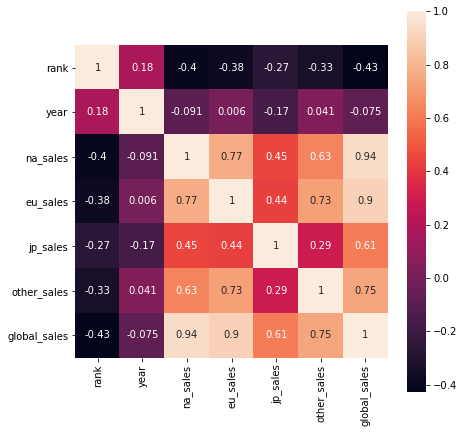

In [15]:
#plotting heatmap for correlation between numerical features
plt.figure(figsize=(7,7))
corr_sales = sales.corr()
axis_corr = sns.heatmap(
corr_sales,
annot=True,
square=True
)
plt.show()

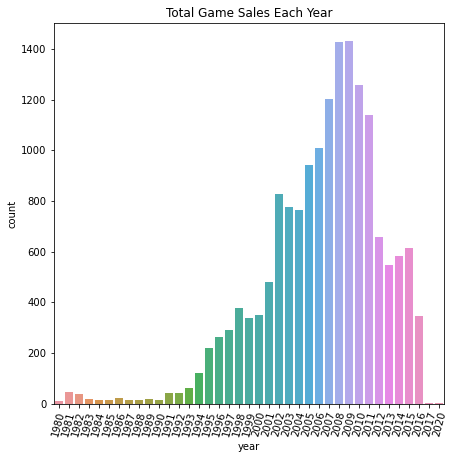

In [16]:
#plotting total game sales each year
plt.figure(figsize=(7,7))
plt.xticks(rotation = 75)
x_axis = sales['year']
sns.countplot(x= x_axis, data = sales)
plt.title('Total Game Sales Each Year')
plt.show()

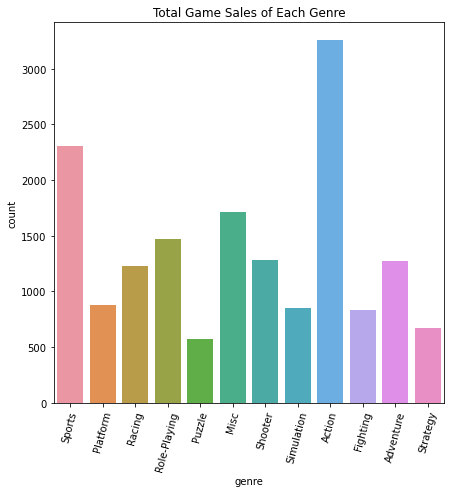

In [17]:
#plotting total game sales of each genre
plt.figure(figsize=(7,7))
plt.xticks(rotation = 75)
x_axis = sales['genre']
sns.countplot(x= x_axis, data = sales)
plt.title('Total Game Sales of Each Genre')
plt.show()

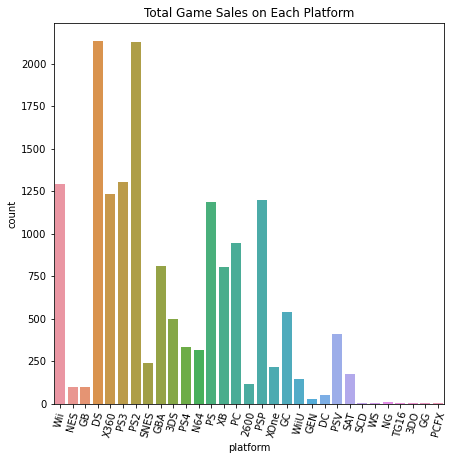

In [18]:
#total game sales on each platform
plt.figure(figsize=(7,7))
plt.xticks(rotation = 75)
x_axis = sales['platform']
sns.countplot(x= x_axis, data = sales)
plt.title('Total Game Sales on Each Platform')
plt.show()

<AxesSubplot:>

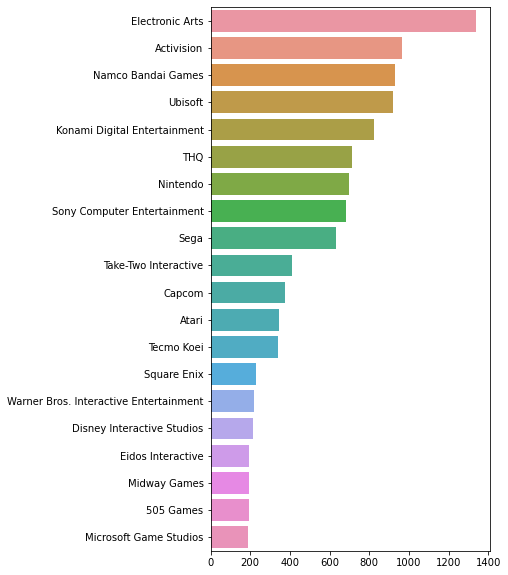

In [19]:
#top 20 publishers with most games released
x= sales.publisher.value_counts().head(20)
plt.figure(figsize= (5,10))
sns.barplot(x.values,x.index)

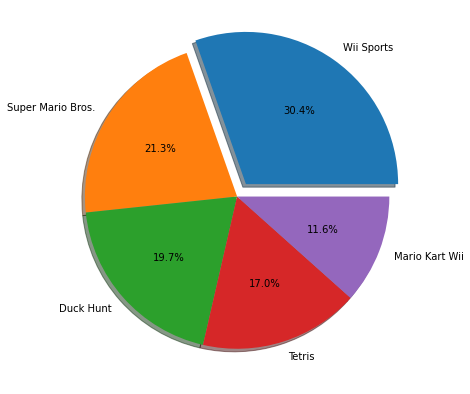

In [20]:
#top 5 games according to sales in North America
plt.figure(figsize=(7,7))
top_games_na = sales.sort_values('na_sales',ascending = False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_na['na_sales'], labels = top_games_na['name'], explode = explode, 
        autopct='%1.1f%%', shadow=True)
plt.show()

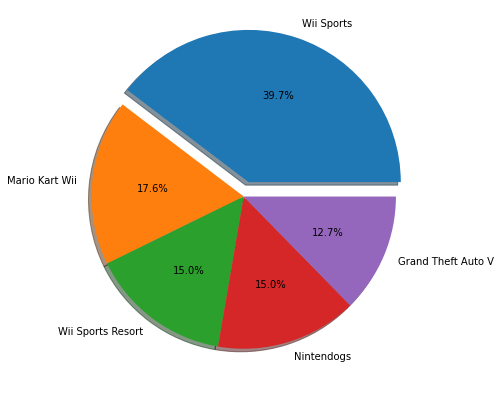

In [21]:
#top 5 games according to sales in Europe
plt.figure(figsize=(7,7))
top_games_eu = sales.sort_values('eu_sales',ascending = False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_eu['eu_sales'], labels = top_games_eu['name'], explode = explode, 
        autopct='%1.1f%%', shadow=True)
plt.show()

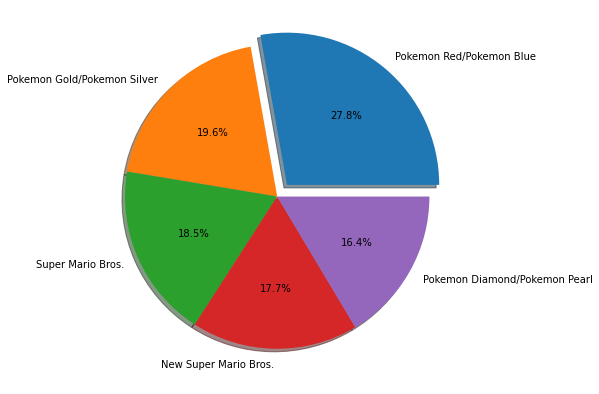

In [22]:
#top 5 games according to sales in Japan
plt.figure(figsize=(7,7))
top_games_jp = sales.sort_values('jp_sales',ascending = False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_jp['jp_sales'], labels = top_games_jp['name'], explode = explode, 
        autopct='%1.1f%%', shadow=True)
plt.show()

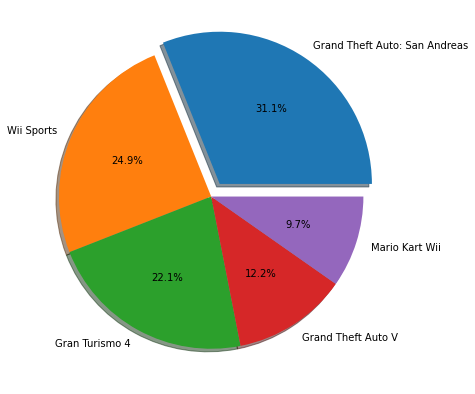

In [23]:
#top 5 games according to sales in other regions
plt.figure(figsize=(7,7))
top_games_other = sales.sort_values('other_sales',ascending = False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_other['other_sales'], labels = top_games_other['name'], explode = explode, 
        autopct='%1.1f%%', shadow=True)
plt.show()

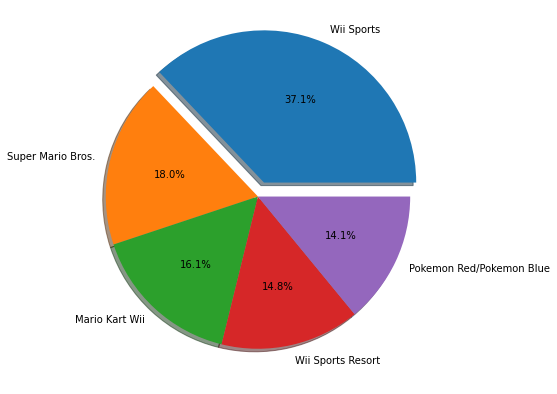

In [24]:
#top 5 games according to global sales
plt.figure(figsize=(7,7))
top_games_global = sales.sort_values('global_sales',ascending = False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_global['global_sales'], labels = top_games_global['name'], explode = explode, 
        autopct='%1.1f%%', shadow=True)
plt.show()

# Latest 3 Available Years

In [25]:
#list of unique years in order
print(sales['year'].nunique())
years = sales['year'].unique()
print(sorted(years))

39
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020]


In [26]:
#data from latest three available years only
latest_years = sales[sales['year'] > 2015]

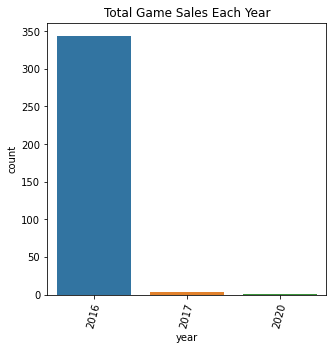

In [27]:
#plotting total game sales each year
plt.figure(figsize=(5,5))
plt.xticks(rotation = 75)
x_axis = latest_years['year']
sns.countplot(x= x_axis, data = sales)
plt.title('Total Game Sales Each Year')
plt.show()

In [28]:
#dropping unnecessary columns
latest_years = latest_years.drop(['rank', 'year', 'na_sales', 'eu_sales','other_sales'],axis=1)

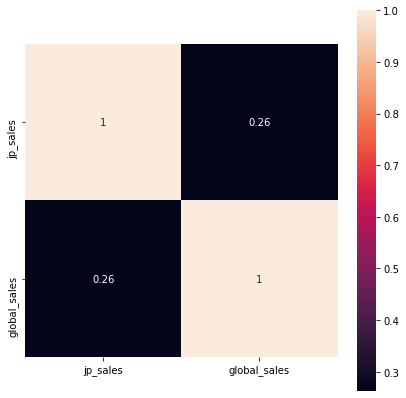

In [29]:
#plotting heatmap for correlation between numerical features in the last 3 years
plt.figure(figsize=(7,7))
corr_sales = latest_years.corr()
axis_corr = sns.heatmap(
corr_sales,
annot=True,
square=True
)

plt.show()

In [30]:
#THREE most popular games in the world from each publisher in the latest available THREE years data
l_y = latest_years.groupby(['name','publisher'],as_index=False).sum()
l_y_1 = l_y.set_index('name').groupby(['publisher'])['global_sales'].nlargest(3).reset_index()
df = pd.merge(l_y, l_y_1, how='inner', on=['publisher','name','global_sales']).reset_index()
df = df.sort_values('publisher')
df = df[['publisher', 'name', 'jp_sales','global_sales']]
df = df.reset_index(drop=True)
df = df.round({'jp_sales': 2,'global_sales': 2})
df.to_csv(r'df.csv')
df

,publisher,name,jp_sales,global_sales
0,505 Games,Rocket League,0.00,0.37
1,505 Games,Assetto Corsa,0.00,0.06
2,505 Games,Terraria,0.04,0.11
3,5pb,Gochuumon wa Usagi Desu ka?? Wonderful Party!,0.02,0.02
4,5pb,MuvLuv Double Pack,0.02,0.02
...,...,...,...,...
123,Warner Bros. Interactive Entertainment,LEGO Marvel's Avengers,0.01,2.26
124,Warner Bros. Interactive Entertainment,Lego Star Wars: The Force Awakens,0.00,1.26
125,Yeti,Koihime Enbu,0.02,0.02
126,dramatic create,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,0.01,0.01


In [31]:
#finiding the publishers for games missing their publisher names
df.loc[(df['publisher'] == 'Unknown')]

,publisher,name,jp_sales,global_sales
120,Unknown,Ao no Kanata no Four Rhythm,0.03,0.03
121,Unknown,"Moshi, Kono Sekai ni Kami-sama ga Iru to suru ...",0.02,0.02
122,Unknown,Persona 5,0.10,0.10


In [32]:
#finiding the publishers for games missing their publisher names
df.loc[(df['publisher'] == 'PQube')]

,publisher,name,jp_sales,global_sales
88,PQube,Guilty Gear Xrd -Revelator-,0.07,0.14
89,PQube,Aegis of Earth: Protonovus Assault,0.00,0.09


In [33]:
#finiding the publishers for games missing their publisher names
df.loc[(df['publisher'] == 'Atlus')]

,publisher,name,jp_sales,global_sales
13,Atlus,Etrian Odyssey V,0.12,0.12
14,Atlus,Persona 5,0.34,0.34


In [34]:
#finiding the publishers for games missing their publisher names
df.loc[(df['publisher'] == 'Rejet')]

,publisher,name,jp_sales,global_sales


In [35]:
#THREE most popular games in JAPAN from each publisher in the latest available THREE years data
l_y_2 = l_y.set_index('name').groupby(['publisher'])['jp_sales'].nlargest(3).reset_index()
df_j = pd.merge(l_y_2, l_y, how='inner', on=['publisher','name','jp_sales']).reset_index()
df_j = df_j.sort_values('publisher')
df_j = df_j[['publisher', 'name', 'jp_sales','global_sales']]
df_j = df_j.reset_index(drop=True)
df_j = df_j.round({'jp_sales': 2,'global_sales': 2})
df_j.to_csv(r'df_j.csv')
df_j

,publisher,name,jp_sales,global_sales
0,505 Games,Terraria,0.04,0.11
1,505 Games,Assetto Corsa,0.00,0.06
2,505 Games,Rocket League,0.00,0.37
3,5pb,Gochuumon wa Usagi Desu ka?? Wonderful Party!,0.02,0.02
4,5pb,MuvLuv Double Pack,0.02,0.02
...,...,...,...,...
123,Warner Bros. Interactive Entertainment,LEGO Marvel's Avengers,0.01,2.26
124,Warner Bros. Interactive Entertainment,Lego Star Wars: The Force Awakens,0.00,1.26
125,Yeti,Koihime Enbu,0.02,0.02
126,dramatic create,Taishou Moebius Line Vitable,0.02,0.02


In [36]:
#finiding the publishers for games missing their publisher names
df_j.loc[(df['publisher'] == 'Unknown')]

,publisher,name,jp_sales,global_sales
120,Unknown,Persona 5,0.10,0.10
121,Unknown,Ao no Kanata no Four Rhythm,0.03,0.03
122,Unknown,"Moshi, Kono Sekai ni Kami-sama ga Iru to suru ...",0.02,0.02


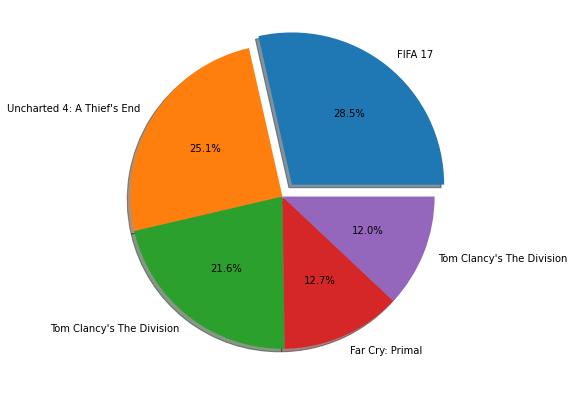

In [37]:
#top 5 games globally in the last three years
top_games_global = latest_years.sort_values('global_sales',ascending = False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.figure(figsize=(7,7))
plt.pie(top_games_global['global_sales'], labels = top_games_global['name'], explode = explode, 
        autopct='%1.1f%%', shadow=True)
plt.show()

In [38]:
#top gaming publishers with most sales in the last three years
latest_years.groupby('publisher').global_sales.sum().sort_values(ascending= False).head()

publisher
Electronic Arts                12.25
Ubisoft                        10.05
Sony Computer Entertainment     6.56
Namco Bandai Games              6.49
Activision                      3.67
Name: global_sales, dtype: float64

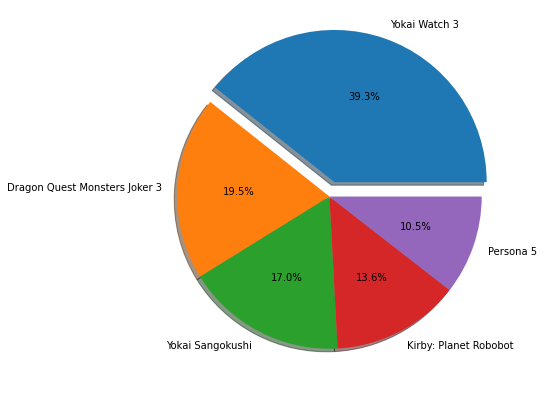

In [39]:
#top 5 games in Japan in the last three years
top_games_global = latest_years.sort_values('jp_sales',ascending = False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.figure(figsize=(7,7))
plt.pie(top_games_global['jp_sales'], labels = top_games_global['name'], explode = explode, 
        autopct='%1.1f%%', shadow=True)
plt.show()

In [40]:
#top gaming publishers with most sales in Japan in the last three years
latest_years.groupby('publisher').jp_sales.sum().sort_values(ascending= False).head()

publisher
Namco Bandai Games    2.34
Square Enix           2.23
Level 5               1.82
Nintendo              1.17
Tecmo Koei            0.78
Name: jp_sales, dtype: float64

In [41]:
#top 3 games by each publisher by rank
df_5 = df_j.loc[(df_j['publisher'] == 'Namco Bandai Games') |
                (df_j['publisher'] == 'Square Enix') |
                (df_j['publisher'] == 'Level 5') |
                (df_j['publisher'] == 'Nintendo') |
                (df_j['publisher'] == 'Tecmo Koei')].reset_index(drop=True)
df_5

,publisher,name,jp_sales,global_sales
0,Level 5,Yokai Sangokushi,0.55,0.55
1,Level 5,Yokai Watch 3,1.27,1.27
2,Namco Bandai Games,Dark Souls III,0.33,1.96
3,Namco Bandai Games,Tales of Berseria,0.33,0.33
4,Namco Bandai Games,Gundam Breaker 3,0.21,0.21
5,Nintendo,Hyrule Warriors,0.11,0.42
6,Nintendo,Mario & Sonic at the Rio 2016 Olympic Games,0.34,0.72
7,Nintendo,Kirby: Planet Robobot,0.44,0.85
8,Square Enix,Dragon Quest Builders: Revive Alefgard,0.64,0.64
9,Square Enix,Dragon Quest Heroes II: Twin Kings and the Pro...,0.64,0.64
